In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

import sys
sys.path.append('/Users/jpw/py/spectools_ir/')
import spectools_ir
from spectools_ir.utils import extract_hitran_data, spec_convol_R
from astropy.table import Table, vstack

from astropy.io import ascii, fits
from matplotlib.gridspec import GridSpec
import pandas as pd

%matplotlib widget

In [2]:
# set up plot parameters
import matplotlib as mpl
mpl.rc('xtick.major', size=5, pad=3, width=2)
mpl.rc('ytick.major', size=5, pad=3, width=2)
mpl.rc('xtick.minor', size=2, pad=3, width=2)
mpl.rc('ytick.minor', size=2, pad=3, width=2)
mpl.rc('axes', linewidth=2, labelsize=18, titlesize=14)
mpl.rc('legend', fontsize=14)
mpl.rc('lines', markersize=5)
mpl.rc('font', size=12)

In [3]:
# read in line lists
hitran_CO = extract_hitran_data('CO', 4.5, 5.5, vup=1)
hitran_CO2 = extract_hitran_data('CO', 4.5, 5.5, vup=2)
hitran_CO3 = extract_hitran_data('CO', 4.5, 5.5, vup=3)
hitran_13CO = extract_hitran_data('CO', 4.5, 5.5, isotopologue_number=2, vup=1)

In [5]:
# load the spectrum
# 0 is metadata (units, inclination, distance), no data
# 1 is the spectrum (lambda, nu, emission, spectrum, continuum)
# 2 is metadata on the transition (molecule, degeneracy, energy, etc)
path = "./radlite/"
hdu = fits.open(path+"radlite_spectrum.fits")
hdu.info()

Filename: ./radlite/radlite_spectrum.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     18   4612R x 5C   [D, D, D, D, D]   
  2                1 BinTableHDU     38   41R x 15C   [A, D, D, D, D, D, D, D, D, D, D, A, A, A, A]   


In [6]:
data = hdu[1].data
wave = data["wavelength"]
flux = 1e3*data["spectrum"]              # just the line, no continuum
wmin = np.min(wave)
wmax = np.max(wave)
fmin = np.nanmin(flux)
fmax = np.nanmax(flux)

In [7]:
# narrow down onto one transition
#wmin = 4.6325
#wmax = 4.6340

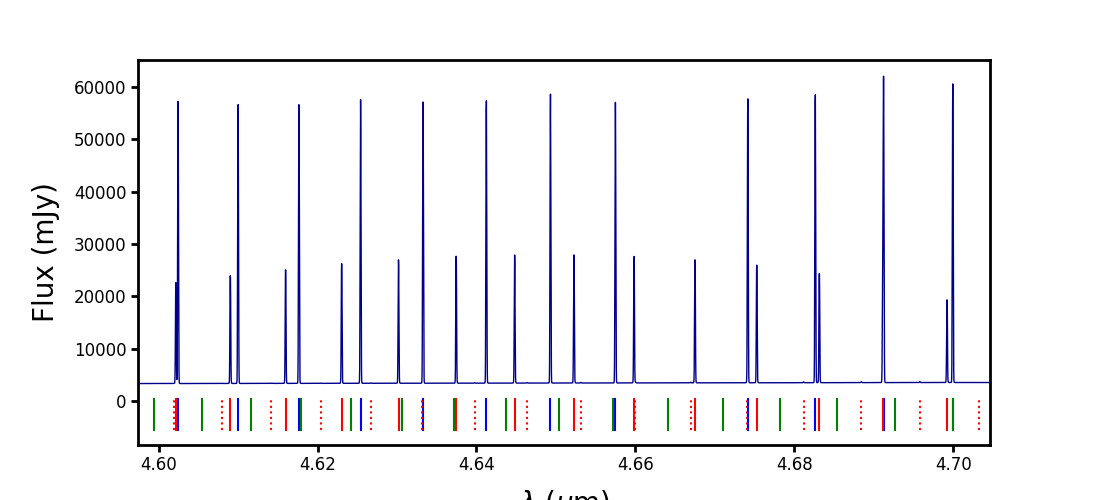

In [8]:
# plot the full spectrum
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)

dy = fmax - fmin
ymax = 1.05*fmax
ymin = fmin - 0.2*dy
y1 = ymin + 0.05*dy
y2 = ymin + 0.15*dy
ax.set_ylim(ymin, ymax)
ax.set_xlim(wmin, wmax)

ax.plot(wave, flux, lw=1, color='darkblue')
ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 20, labelpad=10)
ax.set_ylabel('Flux (mJy)', fontsize = 20, labelpad=10)

for w in hitran_CO['wave']:
    if w > wmin and w < wmax:
        ax.plot([w, w], [y1, y2], color='blue')
for w in hitran_CO2['wave']:
    if w > wmin and w < wmax:
        ax.plot([w, w], [y1, y2], color='red')
for w in hitran_CO3['wave']:
    if w > wmin and w < wmax:
        ax.plot([w, w], [y1, y2], color='red', linestyle=':')
for w in hitran_13CO['wave']:
    if w > wmin and w < wmax:
        ax.plot([w, w], [y1, y2], color='green')